In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
X = iris.data
df.head(125)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
120,6.9,3.2,5.7,2.3,2
121,5.6,2.8,4.9,2.0,2
122,7.7,2.8,6.7,2.0,2
123,6.3,2.7,4.9,1.8,2


In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X = iris.data[:, :2]

y_bool = iris.target!=2

y = iris.target[y_bool]
print(len(y))
scaler1 = MinMaxScaler(feature_range=(0, 1))
X = scaler1.fit_transform(X[y_bool])
# X = X[y_bool]
len(X)
X

100


array([[0.2962963 , 0.625     ],
       [0.22222222, 0.41666667],
       [0.14814815, 0.5       ],
       [0.11111111, 0.45833333],
       [0.25925926, 0.66666667],
       [0.40740741, 0.79166667],
       [0.11111111, 0.58333333],
       [0.25925926, 0.58333333],
       [0.03703704, 0.375     ],
       [0.22222222, 0.45833333],
       [0.40740741, 0.70833333],
       [0.18518519, 0.58333333],
       [0.18518519, 0.41666667],
       [0.        , 0.41666667],
       [0.55555556, 0.83333333],
       [0.51851852, 1.        ],
       [0.40740741, 0.79166667],
       [0.2962963 , 0.625     ],
       [0.51851852, 0.75      ],
       [0.2962963 , 0.75      ],
       [0.40740741, 0.58333333],
       [0.2962963 , 0.70833333],
       [0.11111111, 0.66666667],
       [0.2962963 , 0.54166667],
       [0.18518519, 0.58333333],
       [0.25925926, 0.41666667],
       [0.25925926, 0.58333333],
       [0.33333333, 0.625     ],
       [0.33333333, 0.58333333],
       [0.14814815, 0.5       ],
       [0.

In [8]:
y.shape, X.shape

((100,), (100, 2))

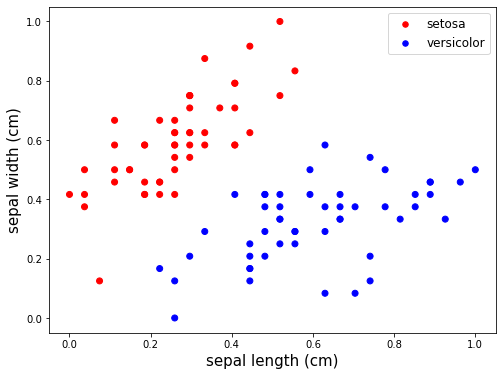

In [9]:
plt.figure(1,figsize=(8,6))
ax = plt.scatter(X[:,0],X[:,1],c=y, cmap="bwr_r")
plt.xlabel(iris.feature_names[0], fontsize=15)
plt.ylabel(iris.feature_names[1], fontsize=15)
s1 = plt.scatter([],[], s=30, marker='o', c='red' )
s2 = plt.scatter([],[], s=30, marker='o', c='blue')

plt.legend((s1,s2),
       (iris.target_names[0],iris.target_names[1]),
       scatterpoints=1,
       loc='upper right',
       fontsize=12,
           )
plt.show()

In [10]:
X = np.c_[np.ones((X.shape[0],1)), X[:]]
y = y.reshape(-1,1)


# Parameters required for Gradient Descent
alpha = 0.1   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(3)  #initializing theta with some random values
theta = theta.reshape(-1,1)

In [11]:
def gradient_descent(x, y, m, theta,  alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value (initial value) to the cost list
    i=0
    while run:
        Z = np.dot(x, theta) 
        prediction = 1 / (1 + np.exp(-Z))   #predicted y values - sigmoid function
        prediction_list.append(prediction)
        error = prediction - y
        cost = np.sum(-(y * np.log(prediction) + (1 - y) * np.log(1 - prediction))) / m   #  (1/2m)*sum[(error)^2]
#         cost = -(1/m)*np.sum(np.dot(y.T, np.log(prediction)) + np.dot((1 - y).T, np.log(1 - prediction)))
        
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-8:   #checking if the change in cost function is less than 10^(-8)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
   
    return prediction_list, cost_list, theta_list

In [12]:
%%time 
prediction_list, cost_list, theta_list = gradient_descent(X, y, m, theta, alpha)
theta = theta_list[-1]

CPU times: total: 13 s
Wall time: 13 s


In [13]:
theta

array([[ -0.93443011],
       [ 40.05992555],
       [-32.15434522]])

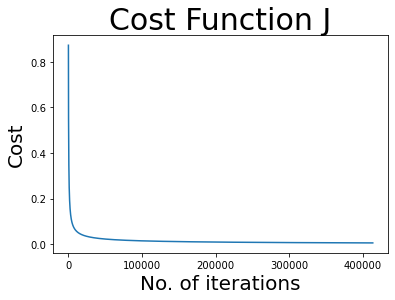

In [14]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [15]:
xx = np.linspace(X.min(), X.max())
yy = - theta[1]/theta[2] *xx - theta[0]/theta[2]

In [16]:
X.shape


(100, 3)

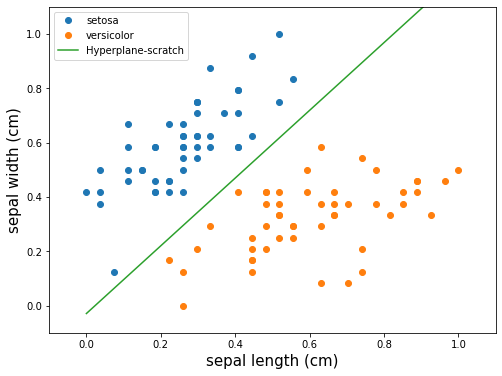

In [17]:
X_setosa = X[:,1:][y.ravel()==0] 
X_versicolor = X[:,1:][y.ravel()==1]
plt.figure(1,figsize=(8,6))
plt.plot(X_setosa[:,0], X_setosa[:,1],'o',label='setosa')
plt.plot(X_versicolor[:,0], X_versicolor[:,1],'o',label='versicolor')
plt.plot(xx,yy,label='Hyperplane-scratch')
plt.xlim(X[:,1].min()-0.1, X[:,1].max()+0.1)
plt.ylim(X[:,2].min()-0.1, X[:,2].max()+0.1)
plt.legend()
plt.xlabel(iris.feature_names[0], fontsize=15)
plt.ylabel(iris.feature_names[1], fontsize=15)
plt.show()

In [18]:
theta

array([[ -0.93443011],
       [ 40.05992555],
       [-32.15434522]])

Hyperparameters

In [21]:
X_sklearn = iris.data[:, :2]

y_bool = iris.target!=2

y = iris.target[y_bool]

X_sklearn = X_sklearn[y_bool]
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e100, penalty='l1', tol=1e-8, solver='liblinear')

In [22]:
lr = lr.fit(X_sklearn,y)

H:\Anaconda\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
lr.coef_

array([[ 12.12412719, -11.76119288]])

In [24]:
lr.intercept_

array([-28.69478269])

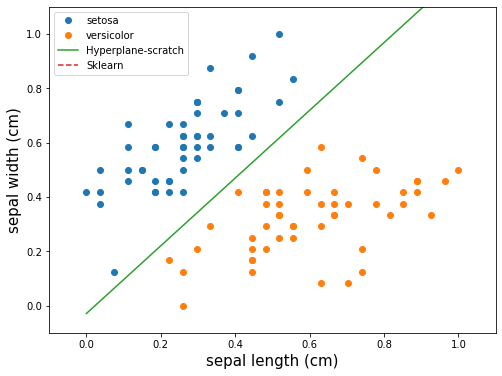

In [25]:
yy_l1 = - lr.coef_[0,0]/lr.coef_[0,1] *xx - lr.intercept_[0]/lr.coef_[0,1]
plt.figure(1,figsize=(8,6))
plt.plot(X_setosa[:,0], X_setosa[:,1],'o',label='setosa')
plt.plot(X_versicolor[:,0], X_versicolor[:,1],'o',label='versicolor')
plt.plot(xx,yy,label='Hyperplane-scratch')
plt.plot(xx,yy_l1,'--',label='Sklearn')
plt.xlim(X[:,1].min()-0.1, X[:,1].max()+0.1)
plt.ylim(X[:,2].min()-0.1, X[:,2].max()+0.1)
plt.legend()
plt.xlabel(iris.feature_names[0], fontsize=15)
plt.ylabel(iris.feature_names[1], fontsize=15)
plt.show()

In [26]:
'Theta_0 and Theta_1 are {},{}'.format(round(theta[0,0],3),round(theta[1,0],3))

'Theta_0 and Theta_1 are -0.934,40.06'

In [27]:
'Theta_0 and Theta_1 are {},{}'.format(round(lr.intercept_[0],3), round(lr.coef_[0,0],3))

'Theta_0 and Theta_1 are -28.695,12.124'

In [28]:
test_data = [[5,3.5]]
iris.target_names[lr.predict(test_data)[0] ]

'setosa'